# **DSUxDIPD Data Competition**
## NYPD Arrest Discrimination Analysis

### Problem statement
Find evidence of discrimination and bias based off a demographic of civilian population in the New York criminal system. Provide visualizations, models, or tables of data that help support your case. 


## *Data Retrieval*

In [2]:
import pandas as pd
arrestsdf = pd.read_csv("/Users/ankushbharadwaj/Downloads/NYPD_Arrests_Data__Historic_.csv")

In [3]:
print(arrestsdf.shape)
arrestsdf.head(10)

(4798339, 18)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
6,173129349,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122
7,173128438,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112
8,173128437,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752
9,173128433,12/31/2017,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936


## *Data Preparation*

The columns and rows with the following conditions should be filtered out:
* columns that provide no information about perpetrator's demographic or their crime or punishment
* rows that have missing values

Columns that provide unnecessary information:
* LAW_CODE
* X_COORD_CD
* Y_COORD_CD
* Latitude
* Longitude

In [4]:
arrestsdf.drop(["LAW_CODE", "X_COORD_CD", "Y_COORD_CD",
               "Latitude", "Longitude"], 
                 axis=1, inplace = True)

In [5]:
for column in arrestsdf:
    missing_val = sum(arrestsdf[column].isnull())
    print("Number of missing values for {}: {}".format(column, missing_val))

Number of missing values for ARREST_KEY: 0
Number of missing values for ARREST_DATE: 0
Number of missing values for PD_CD: 220
Number of missing values for PD_DESC: 8870
Number of missing values for KY_CD: 8870
Number of missing values for OFNS_DESC: 8870
Number of missing values for LAW_CAT_CD: 16103
Number of missing values for ARREST_BORO: 8
Number of missing values for ARREST_PRECINCT: 0
Number of missing values for JURISDICTION_CODE: 10
Number of missing values for AGE_GROUP: 17
Number of missing values for PERP_SEX: 0
Number of missing values for PERP_RACE: 0


We notice that the following columns have missing values:
* PD_CD: Three digit internal classification code
* PD_DESC: Description of crime corresponding to PD_CD
* KY_CD: Three digit internal classification code, more general than PD_CD
* OFNS_DESC: Description of crime corresponding to OFNS_DESC
* LAW_CAT_CD: Level of offense (felony, misdemeanor, violation, infraction)
* ARREST_BORO: Borough of arrest
* JURISDICTION_CODE: Jurisdiction responsible for arrest (0 is Patrol, 1 is Transit, 2 is Housing, >3 is non NYPD)
* AGE_GROUP: Perpetrator's age

In [6]:
arrestsdf.dropna(inplace = True)

In [7]:
arrestsdf.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
dtype: object

In [8]:
cols = ["PD_DESC", "OFNS_DESC", "LAW_CAT_CD", "ARREST_BORO", "AGE_GROUP",
       "PERP_SEX", "PERP_RACE"]
for column in cols:
    print("Value counts for {}:".format(column))
    print("--------------------")
    print(arrestsdf[column].value_counts())
    print("--------------------\n")

Value counts for PD_DESC:
--------------------
MARIJUANA, POSSESSION 4 & 5                   422355
ASSAULT 3                                     375999
THEFT OF SERVICES, UNCLASSIFIED               303358
CONTROLLED SUBSTANCE, POSSESSION 7            278080
NY STATE LAWS,UNCLASSIFIED VIOLATION          225678
LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED    188347
TRAFFIC,UNCLASSIFIED INFRACTION               165645
ASSAULT 2,1,UNCLASSIFIED                      150823
STOLEN PROPERTY 3,POSSESSION                  149875
ROBBERY,UNCLASSIFIED,OPEN AREAS               143263
TRAFFIC,UNCLASSIFIED MISDEMEAN                117644
CONTROLLED SUBSTANCE,INTENT TO SELL 3         113536
TRESPASS 3, CRIMINAL                          109731
INTOXICATED DRIVING,ALCOHOL                   101711
WEAPONS, POSSESSION, ETC                       96197
TRESPASS 2, CRIMINAL                           86447
LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED     85217
CONTROLLED SUBSTANCE,SALE 3                    83890

BLACK                             2319272
WHITE HISPANIC                    1243511
WHITE                              576119
BLACK HISPANIC                     381900
ASIAN / PACIFIC ISLANDER           192212
UNKNOWN                             48725
AMERICAN INDIAN/ALASKAN NATIVE      10429
OTHER                                1363
Name: PERP_RACE, dtype: int64
--------------------



We notie that in the above value counts output, the AGE_GROUP and PERP_RACE columns have  values for "UNKNOWN": rows with these values should be removed as well. Furthermore, the AGE_GROUP column has values that aren't from the set ['<18', '18-24', '25-44', '45-64', '65+']. Rows with these values should be removed as well, as they don't make sense. 

In [9]:
indices = arrestsdf[arrestsdf['AGE_GROUP'] == 'UNKNOWN'].index
arrestsdf.drop(indices, inplace = True)

indices = arrestsdf[arrestsdf['PERP_RACE'] == 'UNKNOWN'].index
arrestsdf.drop(indices, inplace = True)

indices = arrestsdf[(arrestsdf['AGE_GROUP'] != '<18') & 
                   (arrestsdf['AGE_GROUP'] != '18-24') &
                   (arrestsdf['AGE_GROUP'] != '25-44') &
                   (arrestsdf['AGE_GROUP'] != '45-64') &
                   (arrestsdf['AGE_GROUP'] != '65+')].index
arrestsdf.drop(indices, inplace = True)

In [10]:
print("Value counts for AGE_GROUP:")
print("--------------------")
print(arrestsdf["AGE_GROUP"].value_counts())
print("--------------------\n")
print("Value counts for PERP_RACE:")
print("--------------------")
print(arrestsdf["PERP_RACE"].value_counts())
print("--------------------\n")

Value counts for AGE_GROUP:
--------------------
25-44    2164344
18-24    1256156
45-64     867392
<18       398395
65+        38344
Name: AGE_GROUP, dtype: int64
--------------------

Value counts for PERP_RACE:
--------------------
BLACK                             2319187
WHITE HISPANIC                    1243454
WHITE                              576102
BLACK HISPANIC                     381891
ASIAN / PACIFIC ISLANDER           192205
AMERICAN INDIAN/ALASKAN NATIVE      10429
OTHER                                1363
Name: PERP_RACE, dtype: int64
--------------------



## *Exploratory Data Analysis*

The following are factors I'd want to compare with punishment severity to explore demographic bias:
* race of the perpetrator
* age of the perpetrator
* gender of the perpetrator

I will go through these in that order.

### *Race*

In [11]:
race_sev = pd.crosstab(arrestsdf['PERP_RACE'], arrestsdf['LAW_CAT_CD'])

for i in race_sev.index:
    total = sum(race_sev.loc[i])
    new_row = ["%.2f" % (race_sev.loc[i]["F"]/total),
              "%.2f" % (race_sev.loc[i]["I"]/total),
              "%.2f" % (race_sev.loc[i]["M"]/total),
              "%.2f" % (race_sev.loc[i]["V"]/total)]
    race_sev.loc[i] = new_row
print(race_sev)

race_sev = race_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
race_sev.plot(kind = 'bar', stacked = True, 
              color = ['red', 'blue', 'green', 'yellow'], grid = False)

LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.03
BLACK                           0.28  0.00  0.65  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.25  0.00  0.70  0.05
WHITE                           0.24  0.01  0.71  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.06


### *Age*

LAW_CAT_CD     F     I     M     V
AGE_GROUP                         
18-24       0.26  0.00  0.67  0.06
25-44       0.26  0.01  0.67  0.06
45-64       0.24  0.01  0.68  0.07
65+         0.25  0.01  0.69  0.06
<18         0.32  0.00  0.65  0.03


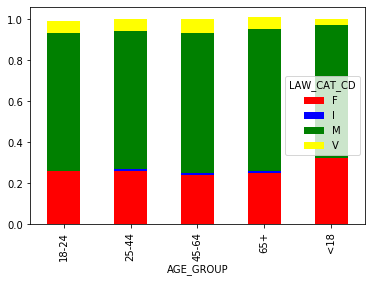

In [12]:
age_sev = pd.crosstab(arrestsdf['AGE_GROUP'], arrestsdf['LAW_CAT_CD'])

for i in age_sev.index:
    total = sum(age_sev.loc[i])
    new_row = ["%.2f" % (age_sev.loc[i]["F"]/total),
              "%.2f" % (age_sev.loc[i]["I"]/total),
              "%.2f" % (age_sev.loc[i]["M"]/total),
              "%.2f" % (age_sev.loc[i]["V"]/total)]
    age_sev.loc[i] = new_row
print(age_sev)

age_sev = age_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
age_sev.plot(kind = 'bar', stacked = True, 
              color = ['red', 'blue', 'green', 'yellow'], grid = False)

### *Gender*

LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.25  0.00  0.72  0.02
M           0.27  0.01  0.66  0.07


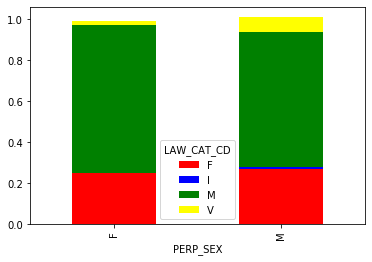

In [13]:
gender_sev = pd.crosstab(arrestsdf['PERP_SEX'], arrestsdf['LAW_CAT_CD'])

for i in gender_sev.index:
    total = sum(gender_sev.loc[i])
    new_row = ["%.2f" % (gender_sev.loc[i]["F"]/total),
              "%.2f" % (gender_sev.loc[i]["I"]/total),
              "%.2f" % (gender_sev.loc[i]["M"]/total),
              "%.2f" % (gender_sev.loc[i]["V"]/total)]
    gender_sev.loc[i] = new_row
print(gender_sev)

gender_sev = gender_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
gender_sev.plot(kind = 'bar', stacked = True, 
              color = ['red', 'blue', 'green', 'yellow'], grid = False)

From here, I'm curious about further investigating the following:
* the punishment severity for each race demographic within their age groups
* the punishment severity for each race demographic within their gender
* the punishment severity for each age group within their gender

### *Race and Age*

Punishment Severity by Race for <18 Age Group


LAW_CAT_CD                         F    I     M     V
PERP_RACE                                            
AMERICAN INDIAN/ALASKAN NATIVE  0.26  0.0  0.71  0.02
ASIAN / PACIFIC ISLANDER        0.30  0.0  0.67  0.02
BLACK                           0.36  0.0  0.61  0.03
BLACK HISPANIC                  0.31  0.0  0.67  0.02
OTHER                           0.25  0.0  0.73  0.02
WHITE                           0.23  0.0  0.74  0.02
WHITE HISPANIC                  0.27  0.0  0.70  0.03


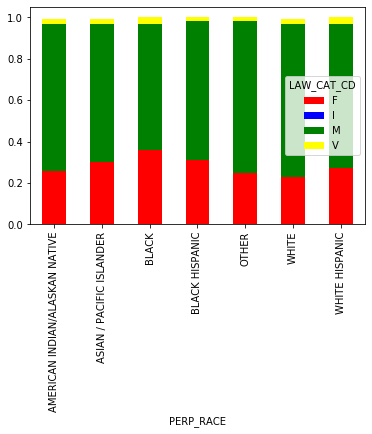



Punishment Severity by Race for 18-24 Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.25  0.01  0.70  0.04
BLACK                           0.29  0.00  0.65  0.06
BLACK HISPANIC                  0.27  0.00  0.69  0.05
OTHER                           0.23  0.00  0.73  0.04
WHITE                           0.21  0.01  0.73  0.05
WHITE HISPANIC                  0.24  0.01  0.69  0.06


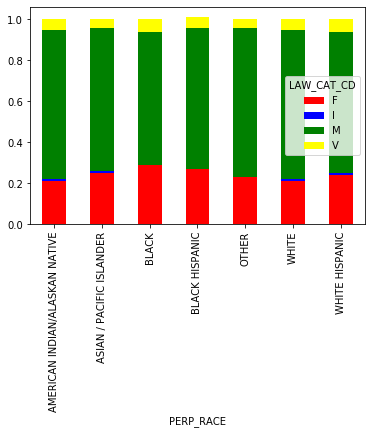



Punishment Severity by Race for 25-44 Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.20  0.01  0.74  0.05
ASIAN / PACIFIC ISLANDER        0.27  0.01  0.69  0.03
BLACK                           0.27  0.01  0.66  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.26  0.00  0.69  0.05
WHITE                           0.24  0.01  0.70  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.07


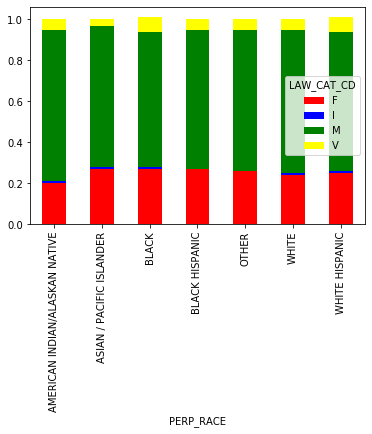



Punishment Severity by Race for 45-64 Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.20  0.01  0.72  0.07
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.70  0.03
BLACK                           0.24  0.00  0.68  0.08
BLACK HISPANIC                  0.27  0.00  0.67  0.06
OTHER                           0.26  0.00  0.69  0.06
WHITE                           0.25  0.01  0.69  0.06
WHITE HISPANIC                  0.25  0.01  0.67  0.07


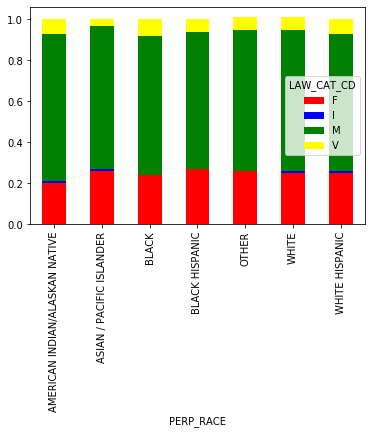



Punishment Severity by Race for 65+ Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.26  0.00  0.71  0.03
ASIAN / PACIFIC ISLANDER        0.22  0.01  0.75  0.03
BLACK                           0.24  0.01  0.69  0.06
BLACK HISPANIC                  0.26  0.01  0.67  0.07
OTHER                           0.22  0.00  0.67  0.11
WHITE                           0.25  0.01  0.69  0.06
WHITE HISPANIC                  0.26  0.01  0.68  0.06


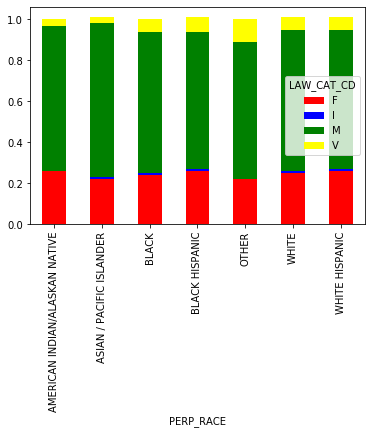

In [14]:
age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]
import matplotlib.pyplot as plt

for j in age_groups:
    working_df = arrestsdf[arrestsdf["AGE_GROUP"] == j]
    race_sev = pd.crosstab(working_df['PERP_RACE'], working_df['LAW_CAT_CD'])
    
    for i in race_sev.index:
        total = sum(race_sev.loc[i])
        new_row = ["%.2f" % (race_sev.loc[i]["F"]/total),
                  "%.2f" % (race_sev.loc[i]["I"]/total),
                  "%.2f" % (race_sev.loc[i]["M"]/total),
                  "%.2f" % (race_sev.loc[i]["V"]/total)]
        race_sev.loc[i] = new_row

    race_sev = race_sev.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
    print("Punishment Severity by Race for {} Age Group".format(j))
    print("\n")
    print(race_sev)
    plt.show(race_sev.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green', 'yellow'], grid = False))
    print("\n")


### *Race and Gender*

Punishment Severity by Race for M Gender


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.72  0.06
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.04
BLACK                           0.28  0.00  0.64  0.07
BLACK HISPANIC                  0.28  0.00  0.67  0.05
OTHER                           0.25  0.00  0.69  0.05
WHITE                           0.24  0.01  0.70  0.06
WHITE HISPANIC                  0.25  0.01  0.67  0.07


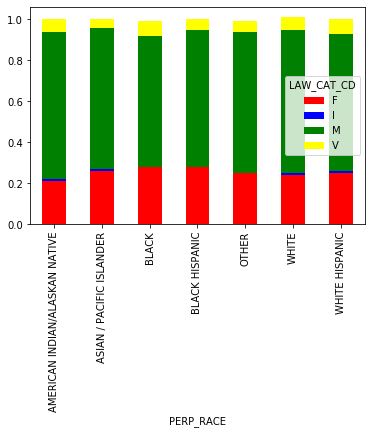



Punishment Severity by Race for F Gender


LAW_CAT_CD                         F    I     M     V
PERP_RACE                                            
AMERICAN INDIAN/ALASKAN NATIVE  0.18  0.0  0.80  0.02
ASIAN / PACIFIC ISLANDER        0.26  0.0  0.73  0.01
BLACK                           0.27  0.0  0.70  0.03
BLACK HISPANIC                  0.25  0.0  0.73  0.02
OTHER                           0.19  0.0  0.80  0.01
WHITE                           0.22  0.0  0.75  0.03
WHITE HISPANIC                  0.23  0.0  0.74  0.02


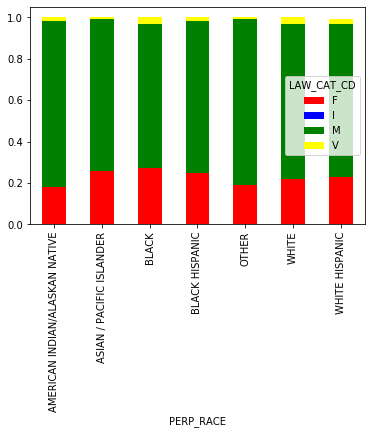

In [15]:
gender_groups = ["M", "F"]

for j in gender_groups:
    working_df = arrestsdf[arrestsdf["PERP_SEX"] == j]
    gender_sev = pd.crosstab(working_df['PERP_RACE'], working_df['LAW_CAT_CD'])
    
    for i in gender_sev.index:
        total = sum(gender_sev.loc[i])
        new_row = ["%.2f" % (gender_sev.loc[i]["F"]/total),
                  "%.2f" % (gender_sev.loc[i]["I"]/total),
                  "%.2f" % (gender_sev.loc[i]["M"]/total),
                  "%.2f" % (gender_sev.loc[i]["V"]/total)]
        gender_sev.loc[i] = new_row

    gender_sev = gender_sev.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
    print("Punishment Severity by Race for {} Gender".format(j))
    print("\n")
    print(gender_sev)
    plt.show(gender_sev.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green', 'yellow'], grid = False))
    print("\n")


### *Age and Gender*

Punishment Severity by Gender for <18 Age Group


LAW_CAT_CD     F    I     M     V
PERP_SEX                         
F           0.24  0.0  0.75  0.01
M           0.34  0.0  0.62  0.03


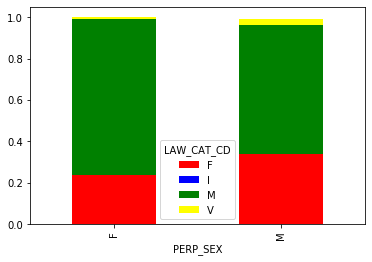



Punishment Severity by Gender for 18-24 Age Group


LAW_CAT_CD     F    I     M     V
PERP_SEX                         
F           0.24  0.0  0.74  0.03
M           0.27  0.0  0.66  0.07


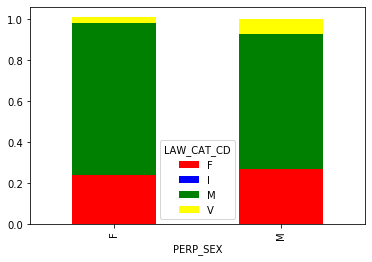



Punishment Severity by Gender for 25-44 Age Group


LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.26  0.00  0.71  0.02
M           0.26  0.01  0.66  0.07


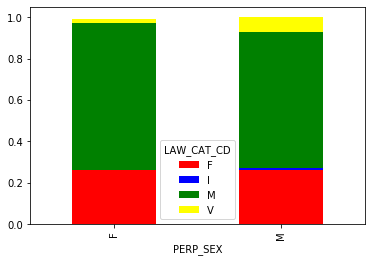



Punishment Severity by Gender for 45-64 Age Group


LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.26  0.00  0.71  0.03
M           0.24  0.01  0.67  0.08


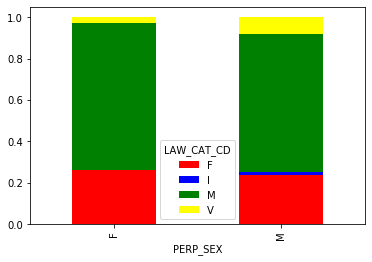



Punishment Severity by Gender for 65+ Age Group


LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.24  0.00  0.72  0.04
M           0.25  0.01  0.68  0.06


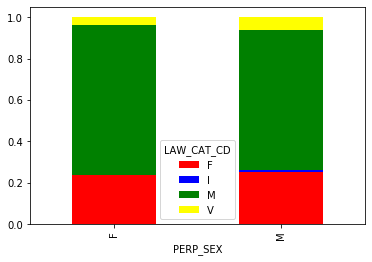

In [16]:
gender_groups = ["M", "F"]
age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]

for j in age_groups:
    working_df = arrestsdf[arrestsdf["AGE_GROUP"] == j]
    gender_sev = pd.crosstab(working_df['PERP_SEX'], working_df['LAW_CAT_CD'])
    
    for i in gender_sev.index:
        total = sum(gender_sev.loc[i])
        new_row = ["%.2f" % (gender_sev.loc[i]["F"]/total),
                  "%.2f" % (gender_sev.loc[i]["I"]/total),
                  "%.2f" % (gender_sev.loc[i]["M"]/total),
                  "%.2f" % (gender_sev.loc[i]["V"]/total)]
        gender_sev.loc[i] = new_row

    gender_sev = gender_sev.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
    print("Punishment Severity by Gender for {} Age Group".format(j))
    print("\n")
    print(gender_sev)
    plt.show(gender_sev.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green', 'yellow'], grid = False))
    print("\n")


Following this exploratory data analysis, I have decided that the first examples of demographic prejudice by the NY criminal system that I will investigate will be the relationship between a perpetrator's race and the severity of punishment recieved. To continue to conducting statistical tests, the following needs to be completed:
* generate contingency and frequency tables
* write the cleaned dataset to a CSV
* generate some bar plots that compare the frequency of different punishment severities between different racial groups 

### *Frequency Tables and CSV Output*

In [39]:
race_sev = pd.crosstab(arrestsdf['PERP_RACE'], arrestsdf['LAW_CAT_CD'])

for i in race_sev.index:
    total = sum(race_sev.loc[i])
    new_row = ["%.2f" % (race_sev.loc[i]["F"]/total),
              "%.2f" % (race_sev.loc[i]["I"]/total),
              "%.2f" % (race_sev.loc[i]["M"]/total),
              "%.2f" % (race_sev.loc[i]["V"]/total)]
    race_sev.loc[i] = new_row

race_sev = race_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})

racesevdf = pd.DataFrame(columns = ["F", "I", "M", "V"], 
                    index = ["AMERICAN INDIAN/ALASKAN NATIVE", "ASIAN / PACIFIC ISLANDER", "BLACK",
                            "BLACK HISPANIC", "OTHER", "WHITE", "WHITE HISPANIC"])

print(race_sev)
for i in range(0,7):
    new_row = [race_sev.iloc[i]["F"], race_sev.iloc[i]["I"], 
               race_sev.iloc[i]["M"], race_sev.iloc[i]["V"]]
    racesevdf.iloc[i] = new_row
print("\n")
print(racesevdf)
racesevdf.to_csv('race_sevdf.csv', header = True)
arrestsdf.to_csv('arrestsdf_cleaned.csv', header = True)

LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.03
BLACK                           0.28  0.00  0.65  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.25  0.00  0.70  0.05
WHITE                           0.24  0.01  0.71  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.06


                                   F     I     M     V
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.03
BLACK                           0.28     0  0.65  0.07
BLACK HISPANIC                  0.27     0  0.68  0.05
OTHER                           0.25     0   0.7  0.05
WHITE                           0.24  0.01  0.71  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.06


### *Proportion of Punishments over All Races*

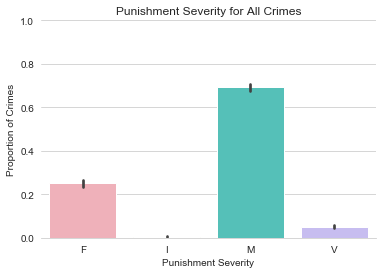

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = sns.barplot(data=race_sev)
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for All Crimes")
plt.savefig('sev_all_crimes.png')
plt.show(g)

### *Proportion of Punishments for American Indian / Alaskan Native Individuals*

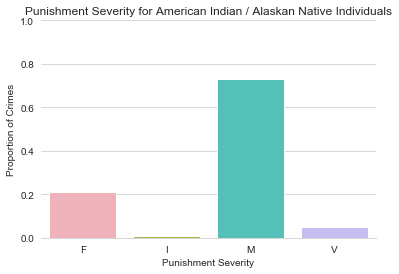

In [19]:
working_series = race_sev.loc['AMERICAN INDIAN/ALASKAN NATIVE']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for American Indian / Alaskan Native Individuals")
plt.savefig('ai-an-sev.png')
plt.show(g)

### *Proportion of Punishments for Asian / Pacific Islander Individuals*

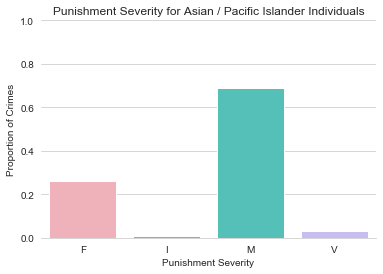

In [20]:
working_series = race_sev.loc['ASIAN / PACIFIC ISLANDER']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Asian / Pacific Islander Individuals")
plt.savefig('a-pi-sev.png')
plt.show(g)

### *Proportion of Punishments for Black Individuals*

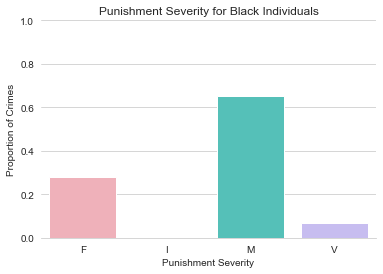

In [21]:
working_series = race_sev.loc['BLACK']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Black Individuals")
plt.savefig('b-sev.png')
plt.show(g)


### *Proportion of Punishments for Black Hispanic Individuals*

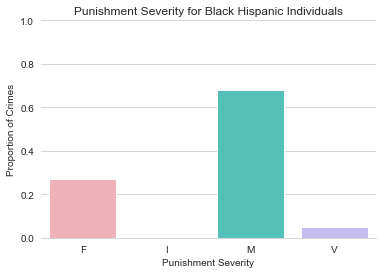

In [22]:
working_series = race_sev.loc['BLACK HISPANIC']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Black Hispanic Individuals")
plt.savefig('bh-sev.png')
plt.show(g)

### *Proportion of Punishments for Other Individuals*

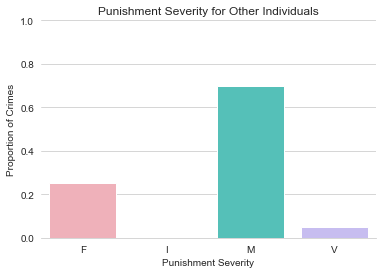

In [23]:
working_series = race_sev.loc['OTHER']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Other Individuals")
plt.savefig('o-sev.png')
plt.show(g)

### *Proportion of Punishments for White Individuals*

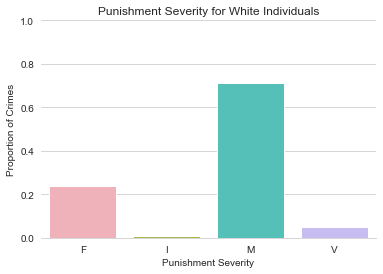

In [24]:
working_series = race_sev.loc['WHITE']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for White Individuals")
plt.savefig('w-sev.png')
plt.show(g)

### *Proportion of Punishments for White Hispanic Individuals*

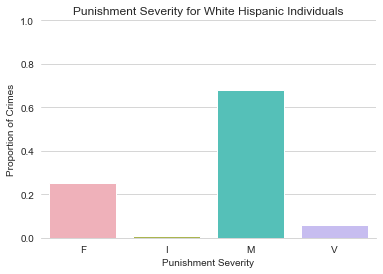

In [25]:
working_series = race_sev.loc['WHITE HISPANIC']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for White Hispanic Individuals")
plt.savefig('wh-sev.')
plt.show(g)

## *Statistical Testing*

In [41]:
race_sev = pd.crosstab(arrestsdf['PERP_RACE'], arrestsdf['LAW_CAT_CD'])
race_sev = race_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
race_sevdf = pd.DataFrame(columns = ["F", "I", "M", "V"], 
                    index = ["AMERICAN INDIAN/ALASKAN NATIVE", "ASIAN / PACIFIC ISLANDER", "BLACK",
                            "BLACK HISPANIC", "OTHER", "WHITE", "WHITE HISPANIC"])

print(race_sev)
for i in range(0,7):
    new_row = [race_sev.iloc[i]["F"], race_sev.iloc[i]["I"], 
               race_sev.iloc[i]["M"], race_sev.iloc[i]["V"]]
    race_sevdf.iloc[i] = new_row


print(race_sevdf)
print("\n")
print(racesevdf)

LAW_CAT_CD                             F        I          M         V
PERP_RACE                                                             
AMERICAN INDIAN/ALASKAN NATIVE    2170.0    106.0     7609.0     544.0
ASIAN / PACIFIC ISLANDER         50244.0   1882.0   133552.0    6527.0
BLACK                           641057.0  10039.0  1514777.0  153314.0
BLACK HISPANIC                  103782.0   1428.0   259209.0   17472.0
OTHER                              339.0      4.0      955.0      65.0
WHITE                           135864.0   3878.0   407261.0   29099.0
WHITE HISPANIC                  309666.0   7847.0   846169.0   79772.0
                                     F      I        M       V
AMERICAN INDIAN/ALASKAN NATIVE    2170    106     7609     544
ASIAN / PACIFIC ISLANDER         50244   1882   133552    6527
BLACK                           641057  10039  1514777  153314
BLACK HISPANIC                  103782   1428   259209   17472
OTHER                              339      4 

As is noticeable from the previous frequency table, as well as through the previous bar plots, there is potential bias towards Black individuals, as their felony rates are higher than every other race. To that extent, I will be implementing Z-tests to determine if the differences in the proportion of felonies handed to Black individuals compared to individuals of other races is statistically significant.

For each of these tests, the null hypothesis will state that the proportion of felonies handed to Black individuals is the less than or equal to the proportion of felonies given to individuals of the race we are observing. The alternate hypothesis will state that the proportion of felonies handed to Black individuals is greater than the proportion of felonies given to individuals of the race we are observing. Therefore, this will be a two proportion, one-tailed Z-test. The alpha value set for this will be the standard .05, which means that a p-value below .05 indicates that we should reject the null hypothesis. 

In [42]:
import math
from scipy.stats import norm

total_black_perps = sum(race_sevdf.loc["BLACK"])
prop_black_felony = race_sevdf.loc["BLACK"]["F"]/total_black_perps

for i in race_sevdf.index:
    working_series = race_sevdf.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sevdf.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 15.575824385000406
p-value: 5.313701554514824e-55
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: 14.154562817740782
p-value: 8.751140252954609e-46
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: 5.966381185709352
p-value: 1.2128661256266069e-09
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 2.2859075196695566
p-value: 0.0111298347211893
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: 62.2157

## *Results and Further Work*

As we can see in the above output, we reject the null hypothesis for every comparison between Black individuals and individuals from another race. The null hypothesis states that the proportion of felonies given to Black individuals is less than or equal to the proportion of felonies given to individuals of other races. By disproving this, we have reached the preliminary conclusion that Black individuals are handed more felonies than individuals of other races, which can be used as an argument supporting prejudice in the NY criminal system.

However, using this preliminary conclusion to argue that prejudice exists against Black individuals compared to every other race in the NY criminal system assumes that every race commits similar crimes overall. However, something that the above analysis leaves out is the possibility that Black individuals commit worse crimes than individuals of other races, which is why they are disproportinately given felony convictions. Therefore, the next step of this analysis would be to investigate whether or not Black people are disproportionatey given felony convictions for the same crime compared to other racial groups. 

## *Data Preparation*

To investigate bias this time around, first the offense descriptions need to be fixed, as some offenses are very similar to other ones but are typed differently. 

In [45]:
import numpy as np
print(np.unique(np.array(arrestsdf["OFNS_DESC"])))

['ABORTION' 'ADMINISTRATIVE CODE' 'ADMINISTRATIVE CODES'
 'ALCOHOLIC BEVERAGE CONTROL LAW' 'ANTICIPATORY OFFENSES' 'ARSON'
 'ASSAULT 3 & RELATED OFFENSES' "BURGLAR'S TOOLS" 'BURGLARY'
 'CHILD ABANDONMENT/NON SUPPORT' 'CHILD ABANDONMENT/NON SUPPORT 1'
 'CRIMINAL MISCHIEF & RELATED OF' 'CRIMINAL MISCHIEF & RELATED OFFENSES'
 'CRIMINAL TRESPASS' 'DANGEROUS DRUGS' 'DANGEROUS WEAPONS'
 'DISORDERLY CONDUCT' 'DISRUPTION OF A RELIGIOUS SERVICE'
 'ENDAN WELFARE INCOMP' 'ESCAPE 3' 'F.C.A. P.I.N.O.S.' 'FELONY ASSAULT'
 'FORCIBLE TOUCHING' 'FORGERY' 'FORTUNE TELLING' 'FRAUDS'
 'FRAUDULENT ACCOSTING' 'GAMBLING' 'GRAND LARCENY'
 'GRAND LARCENY OF MOTOR VEHICLE' 'HARASSMENT' 'HARRASSMENT 2'
 'HOMICIDE-NEGLIGENT,UNCLASSIFIED' 'HOMICIDE-NEGLIGENT-VEHICLE'
 'INTOXICATED & IMPAIRED DRIVING' 'INTOXICATED/IMPAIRED DRIVING'
 'JOSTLING' 'KIDNAPPING & RELATED OFFENSES' 'LOITERING'
 'LOITERING FOR DRUG PURPOSES' 'LOITERING,BEGGING'
 'LOITERING/GAMBLING (CARDS, DICE, ETC)' 'MISCELLANEOUS PENAL LAW'
 'MOVING INF

As we can see from this list of unique offenses, there are some offenses that are very similar, but are labelled differently. Now, we will replace these old descriptions with new ones so that similar offenses are grouped together. 

In [61]:
new_desc = pd.read_csv("/Users/ankushbharadwaj/Desktop/new-descriptions.csv")
print(new_desc.columns)
print(new_desc.head(10))

Index(['OFNS_DESC', 'New Desc'], dtype='object')
                        OFNS_DESC                        New Desc
0                        ABORTION                        ABORTION
1             ADMINISTRATIVE CODE            Administrative Codes
2            ADMINISTRATIVE CODES            Administrative Codes
3  ALCOHOLIC BEVERAGE CONTROL LAW  ALCOHOLIC BEVERAGE CONTROL LAW
4           ANTICIPATORY OFFENSES           ANTICIPATORY OFFENSES
5                           ARSON                           ARSON
6    ASSAULT 3 & RELATED OFFENSES                         Assault
7                 BURGLAR'S TOOLS                 BURGLAR'S TOOLS
8                        BURGLARY                        BURGLARY
9   CHILD ABANDONMENT/NON SUPPORT               Child Abandonment


In [64]:
print(new_desc[new_desc['OFNS_DESC'] != new_desc['New Desc']])
print("\nLength: ")
print(len(new_desc[new_desc['OFNS_DESC'] != new_desc['New Desc']]))

                               OFNS_DESC  \
1                    ADMINISTRATIVE CODE   
2                   ADMINISTRATIVE CODES   
6           ASSAULT 3 & RELATED OFFENSES   
9          CHILD ABANDONMENT/NON SUPPORT   
10       CHILD ABANDONMENT/NON SUPPORT 1   
11        CRIMINAL MISCHIEF & RELATED OF   
12  CRIMINAL MISCHIEF & RELATED OFFENSES   
21                        FELONY ASSAULT   
30                            HARASSMENT   
31                         HARRASSMENT 2   
34        INTOXICATED & IMPAIRED DRIVING   
35          INTOXICATED/IMPAIRED DRIVING   
44        MURDER & NON-NEGL. MANSLAUGHTE   
45       MURDER & NON-NEGL. MANSLAUGHTER   
46                                   NaN   
49         OFF. AGNST PUB ORD SENSBLTY &   
56              OFFENSES INVOLVING FRAUD   
60        OTHER STATE LAWS (NON PENAL LA   
61      OTHER STATE LAWS (NON PENAL LAW)   
66       POSSESSION OF STOLEN PROPERTY 5   

                                       New Desc  
1                        

The output shows that there are 20 instances where the old offense description is replaced by one that allows us to group similar offenses together. 

From here, we would need a frequency table so that we can notice offenses that get a variety of punishments, as these offenses will be what we look at to determine prejudice for specific racial groups.

In [117]:
ofns_sev = pd.crosstab(arrestsdf['OFNS_DESC'], arrestsdf['LAW_CAT_CD'])
print(ofns_sev)

LAW_CAT_CD                                        F      I       M       V
OFNS_DESC                                                                 
ABORTION                                         10      0       0       0
ADMINISTRATIVE CODE                               0     31     311   13041
ADMINISTRATIVE CODES                              0      0       0     156
ALCOHOLIC BEVERAGE CONTROL LAW                    0      0    4868       0
ANTICIPATORY OFFENSES                             3      0     666       0
ARSON                                          1652      0       0       0
ASSAULT 3 & RELATED OFFENSES                      0      0  456159       0
BURGLAR'S TOOLS                                   0      0    6620       0
BURGLARY                                      61314      0       0       0
CHILD ABANDONMENT/NON SUPPORT                    49      0       0       0
CHILD ABANDONMENT/NON SUPPORT 1                 469      0       0       0
CRIMINAL MISCHIEF & RELAT

In [118]:
#for i in ofns_sev.index:
    #new_name = new_desc["New Desc"][new_desc[new_desc["OFNS_DESC"] == i].index]
    #ofns_sev = ofns_sev.rename(index = {i: new_name})

ofns_sev = ofns_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
ofns_sevdf = pd.DataFrame(columns = ["OFNS_CAT", "F", "I", "M", "V"], 
                    index = range(0, len(ofns_sev.index)))

current_row = 0
for i in ofns_sev.index:
    ofns = new_desc["New Desc"][new_desc[new_desc["OFNS_DESC"] == i].index[0]]
    new_row = [ofns, race_sev.loc[i]["F"], race_sev.loc[i]["I"], 
               race_sev.loc[i]["M"], race_sev.loc[i]["V"]]
    ofns_sevdf.loc[current_row] = new_row
    current_row = current_row+1

ofns_sevdf.head()
print(ofns_sevdf.dtypes)
ofns_sevdf = ofns_sevdf.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
print(ofns_sevdf.dtypes)

OFNS_CAT    object
F           object
I           object
M           object
V           object
dtype: object
OFNS_CAT     object
F           float64
I           float64
M           float64
V           float64
dtype: object


In [119]:
print(ofns_sevdf)

                                       OFNS_CAT         F        I         M  \
0                                      ABORTION      10.0      0.0       0.0   
1                          Administrative Codes       0.0     31.0     311.0   
2                          Administrative Codes       0.0      0.0       0.0   
3                ALCOHOLIC BEVERAGE CONTROL LAW       0.0      0.0    4868.0   
4                         ANTICIPATORY OFFENSES       3.0      0.0     666.0   
5                                         ARSON    1652.0      0.0       0.0   
6                                       Assault       0.0      0.0  456159.0   
7                               BURGLAR'S TOOLS       0.0      0.0    6620.0   
8                                      BURGLARY   61314.0      0.0       0.0   
9                             Child Abandonment      49.0      0.0       0.0   
10                            Child Abandonment     469.0      0.0       0.0   
11                            Criminal M

In [120]:
ofns_sevdf.set_index("OFNS_CAT", inplace=True)

In [121]:
print(ofns_sevdf)

                                                    F        I         M  \
OFNS_CAT                                                                   
ABORTION                                         10.0      0.0       0.0   
Administrative Codes                              0.0     31.0     311.0   
Administrative Codes                              0.0      0.0       0.0   
ALCOHOLIC BEVERAGE CONTROL LAW                    0.0      0.0    4868.0   
ANTICIPATORY OFFENSES                             3.0      0.0     666.0   
ARSON                                          1652.0      0.0       0.0   
Assault                                           0.0      0.0  456159.0   
BURGLAR'S TOOLS                                   0.0      0.0    6620.0   
BURGLARY                                      61314.0      0.0       0.0   
Child Abandonment                                49.0      0.0       0.0   
Child Abandonment                               469.0      0.0       0.0   
Criminal Mis

In [122]:
ofns_sevdf = ofns_sevdf.groupby(ofns_sevdf.index).sum()
ofns_sevdf.head(10)

,F,I,M,V
OFNS_CAT,,,,
ABORTION,10.0,0.0,0.0,0.0
ALCOHOLIC BEVERAGE CONTROL LAW,0.0,0.0,4868.0,0.0
ANTICIPATORY OFFENSES,3.0,0.0,666.0,0.0
ARSON,1652.0,0.0,0.0,0.0
Administrative Codes,0.0,31.0,311.0,13197.0
Assault,180060.0,0.0,456235.0,0.0
BURGLAR'S TOOLS,0.0,0.0,6620.0,0.0
BURGLARY,61314.0,0.0,0.0,0.0
CRIMINAL TRESPASS,0.0,0.0,194727.0,0.0


In [123]:
for i in ofns_sevdf.index:
    total = sum(ofns_sevdf.loc[i])
    new_row = ["%.2f" % (ofns_sevdf.loc[i]["F"]/total),
              "%.2f" % (ofns_sevdf.loc[i]["I"]/total),
              "%.2f" % (ofns_sevdf.loc[i]["M"]/total),
              "%.2f" % (ofns_sevdf.loc[i]["V"]/total)]
    ofns_sevdf.loc[i] = new_row
print(ofns_sevdf)

                                                F     I     M     V
OFNS_CAT                                                           
ABORTION                                     1.00  0.00  0.00  0.00
ALCOHOLIC BEVERAGE CONTROL LAW               0.00  0.00  1.00  0.00
ANTICIPATORY OFFENSES                        0.00  0.00  1.00  0.00
ARSON                                        1.00  0.00  0.00  0.00
Administrative Codes                         0.00  0.00  0.02  0.97
Assault                                      0.28  0.00  0.72  0.00
BURGLAR'S TOOLS                              0.00  0.00  1.00  0.00
BURGLARY                                     1.00  0.00  0.00  0.00
CRIMINAL TRESPASS                            0.00  0.00  1.00  0.00
Child Abandonment                            1.00  0.00  0.00  0.00
Criminal Mischief                            0.37  0.00  0.63  0.00
DANGEROUS DRUGS                              0.26  0.00  0.74  0.00
DANGEROUS WEAPONS                            0.4

From here, we would need to decide what qualifies an offense for our futher analysis. Arbitrarily, if an offense has a punishment severity frequency of 1.00, that offense will not be kept. Any other offenses will be kept. 

In [132]:
for i in ofns_sevdf.index:
    if (float(max(ofns_sevdf.loc[i])) == 1.00):
        ofns_sevdf.drop(i, inplace=True)
print(ofns_sevdf)

                                    F     I     M     V
OFNS_CAT                                               
Administrative Codes             0.00  0.00  0.02  0.97
Assault                          0.28  0.00  0.72  0.00
Criminal Mischief                0.37  0.00  0.63  0.00
DANGEROUS DRUGS                  0.26  0.00  0.74  0.00
DANGEROUS WEAPONS                0.47  0.00  0.53  0.00
DUI                              0.10  0.00  0.90  0.00
ENDAN WELFARE INCOMP             0.41  0.00  0.59  0.00
ESCAPE 3                         0.06  0.00  0.94  0.00
GAMBLING                         0.22  0.00  0.78  0.00
Harassment                       0.00  0.00  0.84  0.16
MISCELLANEOUS PENAL LAW          0.90  0.00  0.00  0.10
OFFENSES AGAINST PUBLIC SAFETY   0.04  0.00  0.96  0.00
OTHER STATE LAWS                 0.05  0.00  0.25  0.70
OTHER TRAFFIC INFRACTION         0.00  0.09  0.91  0.00
POSSESSION OF STOLEN PROPERTY    0.10  0.00  0.90  0.00
PROSTITUTION & RELATED OFFENSES  0.04  0.00  0.9

In [134]:
print(ofns_sevdf.dtypes)
ofns_sevdf = ofns_sevdf.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
print(ofns_sevdf.dtypes)

F    object
I    object
M    object
V    object
dtype: object
F    float64
I    float64
M    float64
V    float64
dtype: object


In [136]:
offenses = ofns_sevdf.index
print(offenses)
print(len(offenses))

Index(['Administrative Codes', 'Assault', 'Criminal Mischief',
       'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'DUI', 'ENDAN WELFARE INCOMP',
       'ESCAPE 3', 'GAMBLING', 'Harassment', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST PUBLIC SAFETY', 'OTHER STATE LAWS',
       'OTHER TRAFFIC INFRACTION', 'POSSESSION OF STOLEN PROPERTY',
       'PROSTITUTION & RELATED OFFENSES', 'SEX CRIMES',
       'VEHICLE AND TRAFFIC LAWS'],
      dtype='object', name='OFNS_CAT')
18


Perfect! Now that we have the 18 offenses that we are interested in, the same analysis that was done before can be completed again.

## *Exploratory Data Analysis*

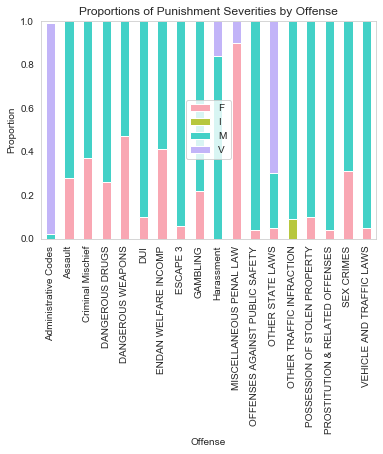

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = ofns_sevdf.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Offense") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Punishment Severities by Offense")
plt.savefig('18offensesproportions.png')
plt.show(g)

The way we're going to be going about this will be as follows:
* iterate through specific offenses above that have the most variation in punishment given 
* subset the dataset to only contain data from the current offense
* construct a frequency table that indicates the proportions of different punishment severities handed to different racial groups for that offense
* add the frequency table to a list for future statistical tests
* construct bar plots to demonstrate differences in frequencies

In [183]:
offenses = ['Assault', 'Criminal Mischief','DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'ENDAN WELFARE INCOMP',
            'MISCELLANEOUS PENAL LAW','OTHER STATE LAWS','SEX CRIMES']

In [184]:
for i in offenses:
    print(i)
    print(len(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == i].index]))
    print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == i].index])
    print('==================================================\n')

Assault
2
6     ASSAULT 3 & RELATED OFFENSES
21                  FELONY ASSAULT
Name: OFNS_DESC, dtype: object

Criminal Mischief
2
11          CRIMINAL MISCHIEF & RELATED OF
12    CRIMINAL MISCHIEF & RELATED OFFENSES
Name: OFNS_DESC, dtype: object

DANGEROUS DRUGS
1
14    DANGEROUS DRUGS
Name: OFNS_DESC, dtype: object

DANGEROUS WEAPONS
1
15    DANGEROUS WEAPONS
Name: OFNS_DESC, dtype: object

ENDAN WELFARE INCOMP
1
18    ENDAN WELFARE INCOMP
Name: OFNS_DESC, dtype: object

MISCELLANEOUS PENAL LAW
1
42    MISCELLANEOUS PENAL LAW
Name: OFNS_DESC, dtype: object

OTHER STATE LAWS
3
59                    OTHER STATE LAWS
60      OTHER STATE LAWS (NON PENAL LA
61    OTHER STATE LAWS (NON PENAL LAW)
Name: OFNS_DESC, dtype: object

SEX CRIMES
1
70    SEX CRIMES
Name: OFNS_DESC, dtype: object



### *Offense: Assault*

In [189]:
pos_names = ["ASSAULT 3 & RELATED OFFENSES", "FELONY ASSAULT"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_assault = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_assault

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,474,1405
ASIAN / PACIFIC ISLANDER,9016,23202
BLACK,92927,216171
BLACK HISPANIC,14636,37079
OTHER,45,117
WHITE,16325,50772
WHITE HISPANIC,46637,127489


LAW_CAT_CD                         F     M
PERP_RACE                                 
AMERICAN INDIAN/ALASKAN NATIVE  0.25  0.75
ASIAN / PACIFIC ISLANDER        0.28  0.72
BLACK                           0.30  0.70
BLACK HISPANIC                  0.28  0.72
OTHER                           0.28  0.72
WHITE                           0.24  0.76
WHITE HISPANIC                  0.27  0.73


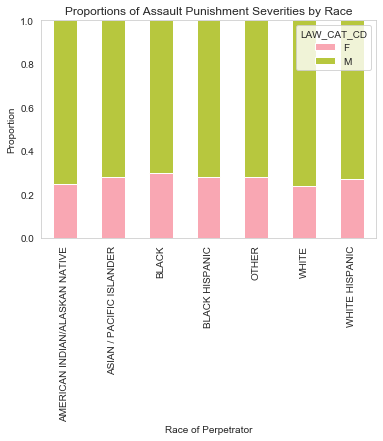

In [190]:
for i in race_sev_assault.index:
    total = sum(race_sev_assault.loc[i])
    new_row = ["%.2f" % (race_sev_assault.loc[i]["F"]/total),
              "%.2f" % (race_sev_assault.loc[i]["M"]/total)]
    race_sev_assault.loc[i] = new_row
print(race_sev_assault)

race_sev_assault = race_sev_assault.astype({"F": float,
                                          "M": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_assault.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Assault Punishment Severities by Race")
plt.savefig('assaultsbyrace.png')
plt.show(g)

### *Offense: Criminal Mischief*

In [191]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == "Criminal Mischief"].index])

11          CRIMINAL MISCHIEF & RELATED OF
12    CRIMINAL MISCHIEF & RELATED OFFENSES
Name: OFNS_DESC, dtype: object


In [192]:
pos_names = ["CRIMINAL MISCHIEF & RELATED OF", "CRIMINAL MISCHIEF & RELATED OFFENSES"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_mischief = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_mischief

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,122,253
ASIAN / PACIFIC ISLANDER,2563,3645
BLACK,23315,34338
BLACK HISPANIC,3810,7520
OTHER,7,24
WHITE,9430,19327
WHITE HISPANIC,14750,27558


LAW_CAT_CD                         F     M
PERP_RACE                                 
AMERICAN INDIAN/ALASKAN NATIVE  0.33  0.67
ASIAN / PACIFIC ISLANDER        0.41  0.59
BLACK                           0.40  0.60
BLACK HISPANIC                  0.34  0.66
OTHER                           0.23  0.77
WHITE                           0.33  0.67
WHITE HISPANIC                  0.35  0.65


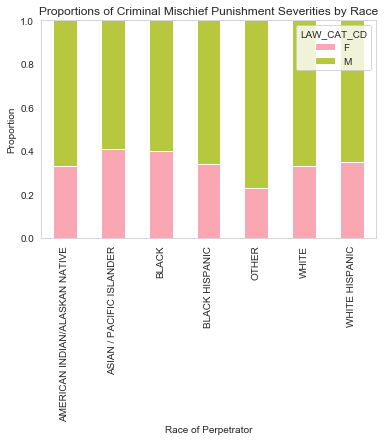

In [193]:
for i in race_sev_mischief.index:
    total = sum(race_sev_mischief.loc[i])
    new_row = ["%.2f" % (race_sev_mischief.loc[i]["F"]/total),
              "%.2f" % (race_sev_mischief.loc[i]["M"]/total)]
    race_sev_mischief.loc[i] = new_row
print(race_sev_mischief)

race_sev_mischief = race_sev_mischief.astype({"F": float,
                                              "M": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_mischief.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Criminal Mischief Punishment Severities by Race")
plt.savefig('criminalmischiefbyrace.png')
plt.show(g)

### *Offense: Dangerous Drugs*

In [195]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'DANGEROUS DRUGS'].index])

14    DANGEROUS DRUGS
Name: OFNS_DESC, dtype: object


In [196]:
pos_names = ["DANGEROUS DRUGS"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_drugs = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_drugs

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,198,1146
ASIAN / PACIFIC ISLANDER,4345,16592
BLACK,129233,396241
BLACK HISPANIC,29675,70193
OTHER,36,188
WHITE,29639,99030
WHITE HISPANIC,76651,195655


LAW_CAT_CD                         F     M
PERP_RACE                                 
AMERICAN INDIAN/ALASKAN NATIVE  0.15  0.85
ASIAN / PACIFIC ISLANDER        0.21  0.79
BLACK                           0.25  0.75
BLACK HISPANIC                  0.30  0.70
OTHER                           0.16  0.84
WHITE                           0.23  0.77
WHITE HISPANIC                  0.28  0.72


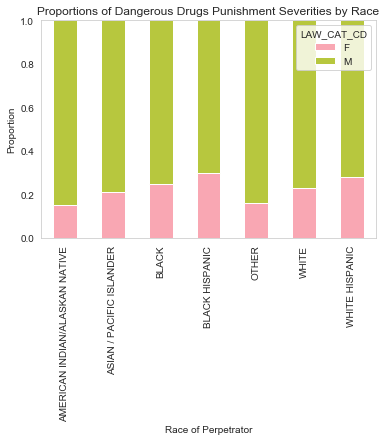

In [197]:
for i in race_sev_drugs.index:
    total = sum(race_sev_drugs.loc[i])
    new_row = ["%.2f" % (race_sev_drugs.loc[i]["F"]/total),
              "%.2f" % (race_sev_drugs.loc[i]["M"]/total)]
    race_sev_drugs.loc[i] = new_row
print(race_sev_drugs)

race_sev_drugs = race_sev_drugs.astype({"F": float,
                                        "M": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_drugs.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Dangerous Drugs Punishment Severities by Race")
plt.savefig('drugsbyrace.png')
plt.show(g)

### *Offense: Dangerous Weapons*

In [198]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'DANGEROUS WEAPONS'].index])

15    DANGEROUS WEAPONS
Name: OFNS_DESC, dtype: object


In [203]:
pos_names = ["DANGEROUS WEAPONS"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_weapons = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_weapons

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,69,194
ASIAN / PACIFIC ISLANDER,1406,2600
BLACK,54535,41423
BLACK HISPANIC,6455,9309
OTHER,8,24
WHITE,5743,12028
WHITE HISPANIC,17899,29965


LAW_CAT_CD                         F     M
PERP_RACE                                 
AMERICAN INDIAN/ALASKAN NATIVE  0.26  0.74
ASIAN / PACIFIC ISLANDER        0.35  0.65
BLACK                           0.57  0.43
BLACK HISPANIC                  0.41  0.59
OTHER                           0.25  0.75
WHITE                           0.32  0.68
WHITE HISPANIC                  0.37  0.63


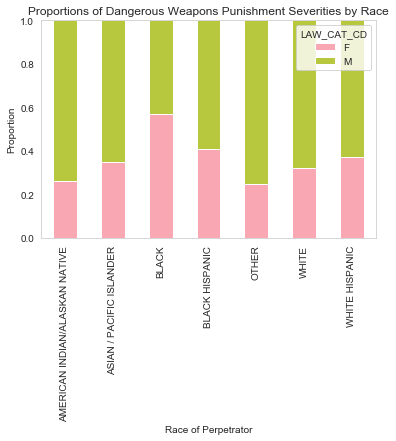

In [204]:
for i in race_sev_weapons.index:
    total = sum(race_sev_weapons.loc[i])
    new_row = ["%.2f" % (race_sev_weapons.loc[i]["F"]/total),
              "%.2f" % (race_sev_weapons.loc[i]["M"]/total)]
    race_sev_weapons.loc[i] = new_row
print(race_sev_weapons)

race_sev_weapons = race_sev_weapons.astype({"F": float, 
                                          "M": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_weapons.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Dangerous Weapons Punishment Severities by Race")
plt.savefig('weaponsbyrace.png')
plt.show(g)

### *Offense: Endan Welfare Incomp*

In [206]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'ENDAN WELFARE INCOMP'].index])

18    ENDAN WELFARE INCOMP
Name: OFNS_DESC, dtype: object


In [207]:
pos_names = ["ENDAN WELFARE INCOMP"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_welfare = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_welfare

LAW_CAT_CD,F,M
PERP_RACE,,
ASIAN / PACIFIC ISLANDER,8,9
BLACK,72,87
BLACK HISPANIC,7,14
WHITE,10,11
WHITE HISPANIC,33,66


LAW_CAT_CD                   F     M
PERP_RACE                           
ASIAN / PACIFIC ISLANDER  0.47  0.53
BLACK                     0.45  0.55
BLACK HISPANIC            0.33  0.67
WHITE                     0.48  0.52
WHITE HISPANIC            0.33  0.67


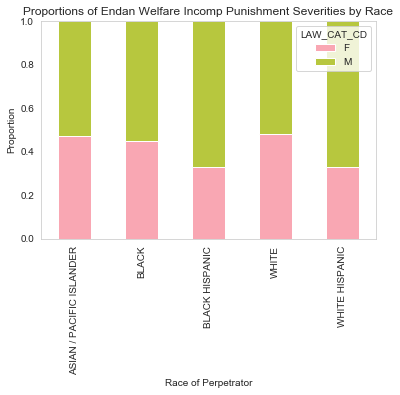

In [208]:
for i in race_sev_welfare.index:
    total = sum(race_sev_welfare.loc[i])
    new_row = ["%.2f" % (race_sev_welfare.loc[i]["F"]/total),
              "%.2f" % (race_sev_welfare.loc[i]["M"]/total)]
    race_sev_welfare.loc[i] = new_row
print(race_sev_welfare)

race_sev_welfare = race_sev_welfare.astype({"F": float, 
                                          "M": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_welfare.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Endan Welfare Incomp Punishment Severities by Race")
plt.savefig('welfarebyrace.png')
plt.show(g)

### *Offense: Misc. Penal Law*

In [209]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'MISCELLANEOUS PENAL LAW'].index])

42    MISCELLANEOUS PENAL LAW
Name: OFNS_DESC, dtype: object


In [210]:
pos_names = ['MISCELLANEOUS PENAL LAW']
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_penal = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_penal

LAW_CAT_CD,F,V
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,360,39
ASIAN / PACIFIC ISLANDER,7407,522
BLACK,74195,9264
BLACK HISPANIC,9655,1034
OTHER,20,3
WHITE,20847,2028
WHITE HISPANIC,34126,3542


LAW_CAT_CD                         F     V
PERP_RACE                                 
AMERICAN INDIAN/ALASKAN NATIVE  0.90  0.10
ASIAN / PACIFIC ISLANDER        0.93  0.07
BLACK                           0.89  0.11
BLACK HISPANIC                  0.90  0.10
OTHER                           0.87  0.13
WHITE                           0.91  0.09
WHITE HISPANIC                  0.91  0.09


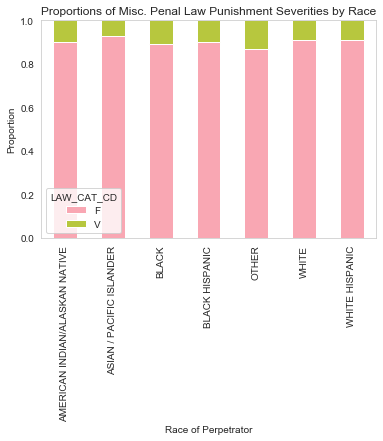

In [211]:
for i in race_sev_penal.index:
    total = sum(race_sev_penal.loc[i])
    new_row = ["%.2f" % (race_sev_penal.loc[i]["F"]/total),
              "%.2f" % (race_sev_penal.loc[i]["V"]/total)]
    race_sev_penal.loc[i] = new_row
print(race_sev_penal)

race_sev_penal = race_sev_penal.astype({"F": float, 
                                        "V": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_penal.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Misc. Penal Law Punishment Severities by Race")
plt.savefig('miscpenalbyrace.png')
plt.show(g)

### *Offense: Other State Laws*

In [212]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'OTHER STATE LAWS'].index])

59                    OTHER STATE LAWS
60      OTHER STATE LAWS (NON PENAL LA
61    OTHER STATE LAWS (NON PENAL LAW)
Name: OFNS_DESC, dtype: object


In [213]:
pos_names = ['OTHER STATE LAWS', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS (NON PENAL LAW)']
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_state = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_state

LAW_CAT_CD,F,I,M,V
PERP_RACE,,,,
AMERICAN INDIAN/ALASKAN NATIVE,43,0,226,432
ASIAN / PACIFIC ISLANDER,4616,15,7549,4476
BLACK,5984,500,40346,120220
BLACK HISPANIC,898,57,4885,13705
OTHER,35,0,131,52
WHITE,1863,113,7671,20578
WHITE HISPANIC,3162,327,17830,63733


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.06  0.00  0.32  0.62
ASIAN / PACIFIC ISLANDER        0.28  0.00  0.45  0.27
BLACK                           0.04  0.00  0.24  0.72
BLACK HISPANIC                  0.05  0.00  0.25  0.70
OTHER                           0.16  0.00  0.60  0.24
WHITE                           0.06  0.00  0.25  0.69
WHITE HISPANIC                  0.04  0.00  0.21  0.75


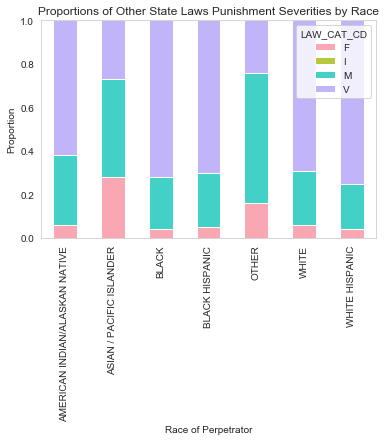

In [215]:
for i in race_sev_state.index:
    total = sum(race_sev_state.loc[i])
    new_row = ["%.2f" % (race_sev_state.loc[i]["F"]/total),
              "%.2f" % (race_sev_state.loc[i]["I"]/total),
              "%.2f" % (race_sev_state.loc[i]["M"]/total),
              "%.2f" % (race_sev_state.loc[i]["V"]/total)]
    race_sev_state.loc[i] = new_row
print(race_sev_state)

race_sev_state = race_sev_state.astype({"F": float, 
                                        "I": float,
                                        "M": float,
                                        "V": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_state.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Other State Laws Punishment Severities by Race")
plt.savefig('statebyrace.png')
plt.show(g)

### *Offense: Sex Crimes*

In [216]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'SEX CRIMES'].index])

70    SEX CRIMES
Name: OFNS_DESC, dtype: object


In [217]:
pos_names = ['SEX CRIMES']
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_sex = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_sex

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,30,75
ASIAN / PACIFIC ISLANDER,457,1295
BLACK,3723,9089
BLACK HISPANIC,895,1791
OTHER,5,9
WHITE,1181,2162
WHITE HISPANIC,3366,6666


LAW_CAT_CD                         F     M
PERP_RACE                                 
AMERICAN INDIAN/ALASKAN NATIVE  0.29  0.71
ASIAN / PACIFIC ISLANDER        0.26  0.74
BLACK                           0.29  0.71
BLACK HISPANIC                  0.33  0.67
OTHER                           0.36  0.64
WHITE                           0.35  0.65
WHITE HISPANIC                  0.34  0.66


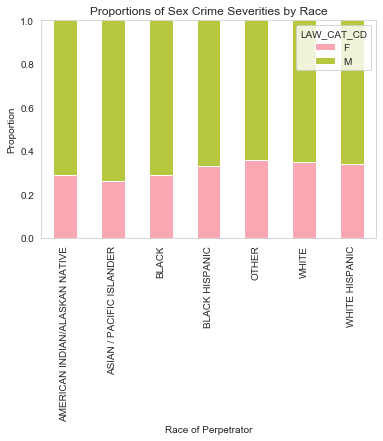

In [218]:
for i in race_sev_sex.index:
    total = sum(race_sev_sex.loc[i])
    new_row = ["%.2f" % (race_sev_sex.loc[i]["F"]/total),
              "%.2f" % (race_sev_sex.loc[i]["M"]/total)]
    race_sev_sex.loc[i] = new_row
print(race_sev_sex)

race_sev_sex = race_sev_sex.astype({"F": float, 
                                    "M": float})

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = race_sev_sex.plot(kind = 'bar', stacked = True, grid = False)
plt.xlabel("Race of Perpetrator") 
plt.ylabel("Proportion")
plt.ylim(0,1.0) 
plt.title("Proportions of Sex Crime Severities by Race")
plt.savefig('sexbyrace.png')
plt.show(g)

## *Statistical Testing*

Following the previous visualizations and frequency tables, I have identified specific offenses where I would like to investigate racial bias in terms of punishment severity. Now, I will perform similar two-proportion, one-tailed Z-tests as I did before to determine whether or not this bias is significant by evaluating whether or not the proportion of felonies given to Black individuals is indeed higher than other races. To that extent, for each offense I am observing, the null hypothesis states that the proportion of felonies that are given to Black individuals is less than or equal to the proportion of felonies given to individuals of other racial groups, for that specific offense. The alternate hypothesis states that the proportion of felonies that are given to Black individuals is greater than the proportion of felonies given to individuals of other racial groups, for that specific offense. 

### *Offense: Assault*

In [219]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'Assault'].index])

6     ASSAULT 3 & RELATED OFFENSES
21                  FELONY ASSAULT
Name: OFNS_DESC, dtype: object


In [220]:
pos_names = ["ASSAULT 3 & RELATED OFFENSES", "FELONY ASSAULT"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_assault = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_assault

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,474,1405
ASIAN / PACIFIC ISLANDER,9016,23202
BLACK,92927,216171
BLACK HISPANIC,14636,37079
OTHER,45,117
WHITE,16325,50772
WHITE HISPANIC,46637,127489


In [228]:
import math
from scipy.stats import norm

total_black_perps = sum(race_sev_assault.loc["BLACK"])
prop_black_felony = race_sev_assault.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_assault.index:
    working_series = race_sev_assault.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_assault.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 4.560760121731523
p-value: 2.548438999214809e-06
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: 7.76127825804759
p-value: 4.20388094504007e-15
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: 8.110734052199364
p-value: 2.5157435357908305e-16
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 0.6344244843038136
p-value: 0.26290191748530345
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: 29

### *Offense: Criminal Mischief*

In [229]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'Criminal Mischief'].index])

11          CRIMINAL MISCHIEF & RELATED OF
12    CRIMINAL MISCHIEF & RELATED OFFENSES
Name: OFNS_DESC, dtype: object


In [231]:
pos_names = ["CRIMINAL MISCHIEF & RELATED OF", "CRIMINAL MISCHIEF & RELATED OFFENSES"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_mischief = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_mischief

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,122,253
ASIAN / PACIFIC ISLANDER,2563,3645
BLACK,23315,34338
BLACK HISPANIC,3810,7520
OTHER,7,24
WHITE,9430,19327
WHITE HISPANIC,14750,27558


In [232]:
total_black_perps = sum(race_sev_mischief.loc["BLACK"])
prop_black_felony = race_sev_mischief.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_mischief.index:
    working_series = race_sev_mischief.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_mischief.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 3.110414961319529
p-value: 0.0009341234083523524
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: -1.288883087902594
p-value: 0.09871936721238245
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: 13.571910391796557
p-value: 2.9385024864825126e-42
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 2.0256690314283863
p-value: 0.02139935613038772
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: 

### *Offense: Dangerous Drugs*

In [233]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'DANGEROUS DRUGS'].index])

14    DANGEROUS DRUGS
Name: OFNS_DESC, dtype: object


In [234]:
pos_names = ["DANGEROUS DRUGS"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_drugs = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_drugs

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,198,1146
ASIAN / PACIFIC ISLANDER,4345,16592
BLACK,129233,396241
BLACK HISPANIC,29675,70193
OTHER,36,188
WHITE,29639,99030
WHITE HISPANIC,76651,195655


In [235]:
total_black_perps = sum(race_sev_drugs.loc["BLACK"])
prop_black_felony = race_sev_drugs.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_drugs.index:
    working_series = race_sev_drugs.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_drugs.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 8.387275031620252
p-value: 2.4877003383992604e-17
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: 12.681410658632652
p-value: 3.748516604733758e-37
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: -34.07234064657442
p-value: 9.47556278783785e-255
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 2.9613409086473195
p-value: 0.0015315134610171279
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: 11.6

### *Offense: Dangerous Weapons*

In [236]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'DANGEROUS WEAPONS'].index])

15    DANGEROUS WEAPONS
Name: OFNS_DESC, dtype: object


In [238]:
pos_names = ["DANGEROUS WEAPONS"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_weapons = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_weapons

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,69,194
ASIAN / PACIFIC ISLANDER,1406,2600
BLACK,54535,41423
BLACK HISPANIC,6455,9309
OTHER,8,24
WHITE,5743,12028
WHITE HISPANIC,17899,29965


In [239]:
total_black_perps = sum(race_sev_weapons.loc["BLACK"])
prop_black_felony = race_sev_weapons.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_weapons.index:
    working_series = race_sev_weapons.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_weapons.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 10.001757480862945
p-value: 7.485803393777514e-24
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: 27.149924898509507
p-value: 1.2685939875814847e-162
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: 37.12311365239036
p-value: 5.953693778690513e-302
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 3.6347836711847488
p-value: 0.00013910699339922153
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: 6

### *Offense: Endan Welfare Incomp*

In [240]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'ENDAN WELFARE INCOMP'].index])

18    ENDAN WELFARE INCOMP
Name: OFNS_DESC, dtype: object


In [241]:
pos_names = ["ENDAN WELFARE INCOMP"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_welfare = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_welfare

LAW_CAT_CD,F,M
PERP_RACE,,
ASIAN / PACIFIC ISLANDER,8,9
BLACK,72,87
BLACK HISPANIC,7,14
WHITE,10,11
WHITE HISPANIC,33,66


In [242]:
total_black_perps = sum(race_sev_welfare.loc["BLACK"])
prop_black_felony = race_sev_welfare.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_welfare.index:
    working_series = race_sev_welfare.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_welfare.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: -0.1397635548931107
p-value: 0.44442340479034004
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: 1.037114499895453
p-value: 0.1498412491849339
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: -0.2020238678668061
p-value: 0.41994903250921434
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE HISPANIC Individuals
z-score: 1.8999497905738323
p-value: 0.02871985450555852
Decision: Reject the null hypothesis.
---------------------------------------------




### *Offense: Misc. Penal Law*

In [243]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'MISCELLANEOUS PENAL LAW'].index])

42    MISCELLANEOUS PENAL LAW
Name: OFNS_DESC, dtype: object


In [244]:
pos_names = ["MISCELLANEOUS PENAL LAW"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_penal = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_penal

LAW_CAT_CD,F,V
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,360,39
ASIAN / PACIFIC ISLANDER,7407,522
BLACK,74195,9264
BLACK HISPANIC,9655,1034
OTHER,20,3
WHITE,20847,2028
WHITE HISPANIC,34126,3542


In [245]:
total_black_perps = sum(race_sev_penal.loc["BLACK"])
prop_black_felony = race_sev_penal.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_penal.index:
    working_series = race_sev_penal.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_penal.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: -0.8411357276859444
p-value: 0.20013595092884823
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: -12.42945818482635
p-value: 9.04279954111208e-36
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: -4.449121446262394
p-value: 4.311112713744528e-06
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 0.2966521724120624
p-value: 0.38336603747548753
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z

### *Offense: Other State Laws*

In [246]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'OTHER STATE LAWS'].index])

59                    OTHER STATE LAWS
60      OTHER STATE LAWS (NON PENAL LA
61    OTHER STATE LAWS (NON PENAL LAW)
Name: OFNS_DESC, dtype: object


In [247]:
pos_names = ["OTHER STATE LAWS", "OTHER STATE LAWS (NON PENAL LA", "OTHER STATE LAWS (NON PENAL LAW)"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_state = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_state

LAW_CAT_CD,F,I,M,V
PERP_RACE,,,,
AMERICAN INDIAN/ALASKAN NATIVE,43,0,226,432
ASIAN / PACIFIC ISLANDER,4616,15,7549,4476
BLACK,5984,500,40346,120220
BLACK HISPANIC,898,57,4885,13705
OTHER,35,0,131,52
WHITE,1863,113,7671,20578
WHITE HISPANIC,3162,327,17830,63733


In [248]:
total_black_perps = sum(race_sev_state.loc["BLACK"])
prop_black_felony = race_sev_state.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_state.index:
    working_series = race_sev_state.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_state.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: -3.6228158870232647
p-value: 0.00014570662500288482
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: -127.36407771437024
p-value: 0.0
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: -7.105274691328584
p-value: 6.004172906188301e-13
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: -9.881301365607127
p-value: 2.5088493558268698e-23
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: -21.13290773676771

### *Offense: Sex Crimes*

In [249]:
print(new_desc["OFNS_DESC"][new_desc[new_desc["New Desc"] == 'SEX CRIMES'].index])

70    SEX CRIMES
Name: OFNS_DESC, dtype: object


In [250]:
pos_names = ["SEX CRIMES"]
temp_arrestsdf = arrestsdf[arrestsdf["OFNS_DESC"].isin(pos_names)]

race_sev_sex = pd.crosstab(temp_arrestsdf['PERP_RACE'], temp_arrestsdf['LAW_CAT_CD'])
race_sev_sex

LAW_CAT_CD,F,M
PERP_RACE,,
AMERICAN INDIAN/ALASKAN NATIVE,30,75
ASIAN / PACIFIC ISLANDER,457,1295
BLACK,3723,9089
BLACK HISPANIC,895,1791
OTHER,5,9
WHITE,1181,2162
WHITE HISPANIC,3366,6666


In [251]:
total_black_perps = sum(race_sev_sex.loc["BLACK"])
prop_black_felony = race_sev_sex.loc["BLACK"]["F"]/total_black_perps

for i in race_sev_sex.index:
    working_series = race_sev_sex.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sev_sex.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 0.10952634341981936
p-value: 0.4563925142133093
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: 2.5811810790153245
p-value: 0.004923146013310721
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: -4.391315059501768
p-value: 5.633357218181267e-06
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: -0.5481428978334917
p-value: 0.29179689356639354
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z

## *Results and Further Work*

From the above output, we have reached the following conclusions for each of the offenses we observed:
* When considering Assault, Black individuals are proportionally given more felonies compared to American Indian / Alaskan Native, Asian / Pacific Islander, Black Hispanic, White, and White Hispanic individuals
* When considering Criminal Mischief, Black individuals are proportionally given more felonies compared to American Indian / Alaskan Native, Black Hispanic, Other, White, and White Hispanic individuals
* When considering Dangerous Drugs, Black individuals are proportionally given more felonies compared to American Indian / Alaskan Native, Asian / Pacific Islander, Black Hispanic, Other, White, and White Hispanic individuals
* When considering Dangerous Weapons, Black individuals are proportionally given more felonies compared to American Indian / Alaskan Native, Asian / Pacific Islander, Black Hispanic, Other, White, and White Hispanic individuals
* When considering Sex Crimes, Black individuals are proportionally given more felonies compared to Asian / Pacific Islander, Black Hispanic, White, and White Hispanic individuals
* When considering Endan Welfare Incomp, Black individuals are proportionally given more felonies compared to White Hispanic individuals
* When considering Miscellaneous Penal Laws, Black individuals are proportionally given more felonies compared to Asian / Pacific Islander, Black Hispanic, White, and White Hispanic individuals
* When considering Other State Laws, Black individuals are proportionally given more felonies compared to American Indian / Alaskan Native, Asian / Pacific Islander, Black Hispanic, Other, White, and White Hispanic individuals
* When considering Sex Crimes, Black individuals are proportionally given more felonies compared to Asian / Pacific Islander, Black Hispanic, White, and White Hispanic individuals

Therefore, in conjunction with the prior Z-test results that revealed that Black individuals are given more felonies by proportion to the total number of crimes committed compared to individuals from other racial groups, there is a very solid case for racial prejudice against Black individuals by the criminal system in New York City. Specifically, when considering the above offenses, Black individuals seem to be targeted with felonies at a higher rate across the board for every offense except for Endan Welfare Incomp. 

For further work, it would be interesting to observe which demographic within racial groups is targeted the most. For example, based on what I've seen in the news, I would assume that Black individuals who identify as Male between the ages of 18-24 or 25-44 would recieve the highest proportion of felonies overall as well as when considering specific offenses. Investigating this hypothesis in depth, similar to the process used above, would be a very useful extension of this project. 